# Sprint 8.01 - Nivell 1

Realitza la connexió en Python amb el MySQL Workbench per a carregar tota la informació que tens en les taules.

Realitzaràs una visualització per a cada exercici. Comenta el que et crida l'atenció de graficar aquesta variable, justifica l'elecció del gràfic i interpreta els resultats en funció de les teves dades.

### Importación de bibliotecas

In [2]:
import mysql.connector

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime, date

sns.set_theme(style='ticks')

### Función para conectar Python con MySQL y cargar tablas como dataframes

In [3]:
def get_database(host, user, password, database):
    try:
        cnx = mysql.connector.connect(
            host = host,
            user = user,
            password = password,
            database = database
        )
    
        if cnx.is_connected():
            print(f'Se conectó a la base de datos "{database}" en MySQL')
    
        cursor = cnx.cursor()
        cursor.execute('SHOW TABLES;')
        tables = cursor.fetchall()
        table_names = [table[0] for table in tables]

        print(f'Tablas encontradas: {table_names}.')

        db = {}

        for table in table_names:
            query = f'SELECT * FROM {table};'
            db[table] = pd.read_sql(query, con = cnx) 
        return db
    
    except mysql.connector.Error as error:
        print(f'Error: {error}')
        return None

    finally:
        if cnx.is_connected():
            cnx.close()
            print('Conexión a MySQL cerrada.')


def rename_dfs():
    for table, df in db.items():
        globals()[table] = df
        print(f'Se creó el dataframe "{table}"')

if __name__ == '__main__':
    host = 'localhost'
    user = 'root'
    password = 'rootpassword'
    database = 'transactionsnew'

    db = get_database(host, user, password, database)
    rename_dfs()

Se conectó a la base de datos "transactionsnew" en MySQL
Tablas encontradas: ['bridge_products', 'card_status', 'companies', 'credit_cards', 'products', 'transactions', 'users'].
Conexión a MySQL cerrada.
Se creó el dataframe "bridge_products"
Se creó el dataframe "card_status"
Se creó el dataframe "companies"
Se creó el dataframe "credit_cards"
Se creó el dataframe "products"
Se creó el dataframe "transactions"
Se creó el dataframe "users"


C:\Users\Evelyn\AppData\Local\Temp\ipykernel_19268\1900776162.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  db[table] = pd.read_sql(query, con = cnx)


### EDA de los df de la base de datos _transactionsnew_

Se hizo un análisis básico de los _dataframes_ para conocer la base de datos. La tabla _transactions_ se exploró con detalle, con varios métodos Pandas. Al resto de las tablas solo se les realizó los métodos _head_ e _info_, ya que los datos de las tablas no presentan nulos ni complejidad alguna. Pocas tablas tienen variables numéricas, en estas se aplicó también el método _describe_ para obtener datos numéricos estadísticos.

#### Tabla _transactions_

In [4]:
transactions.head()

,id,card_id,company_id,timestamp,amount,declined,product_ids,user_id,lat,longitude
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,CcU-2938,b-2362,2021-08-28 23:42:24,466.92,0,"71, 1, 19",92,81.9185,-12.5276
1,0466A42E-47CF-8D24-FD01-C0B689713128,CcU-4219,b-2302,2021-07-26 07:29:18,49.53,0,"47, 97, 43",170,-43.9695,-117.5250
2,063FBA79-99EC-66FB-29F7-25726D1764A5,CcU-2987,b-2250,2022-01-06 21:25:27,92.61,0,"47, 67, 31, 5",275,-81.2227,-129.0500
3,0668296C-CDB9-A883-76BC-2E4C44F8C8AE,CcU-3743,b-2618,2022-01-26 02:07:14,394.18,0,"89, 83, 79",265,-34.3593,-100.5560
4,06CD9AA5-9B42-D684-DDDD-A5E394FEBA99,CcU-2959,b-2346,2021-10-26 23:00:01,279.93,0,"43, 31",92,33.7381,158.2980


In [5]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           587 non-null    object        
 1   card_id      587 non-null    object        
 2   company_id   587 non-null    object        
 3   timestamp    587 non-null    datetime64[ns]
 4   amount       587 non-null    float64       
 5   declined     587 non-null    int64         
 6   product_ids  587 non-null    object        
 7   user_id      587 non-null    int64         
 8   lat          587 non-null    float64       
 9   longitude    587 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 46.0+ KB


In [6]:
transactions.describe()

,timestamp,amount,declined,user_id,lat,longitude
count,587,587.000000,587.000000,587.000000,587.000000,587.000000
mean,2021-09-06 14:56:16.795570688,256.735520,0.148211,201.359455,0.672389,-4.469083
min,2021-03-17 02:55:49,15.050000,0.000000,60.000000,-89.824800,-179.366000
25%,2021-06-02 05:14:58.500000,131.115000,0.000000,126.000000,-44.024000,-98.952450
50%,2021-08-27 10:25:34,257.440000,0.000000,220.000000,1.402780,-5.964040
75%,2021-12-13 08:24:48,389.900000,0.000000,268.000000,44.870100,88.348400
max,2022-03-16 14:01:36,499.230000,1.000000,275.000000,89.921200,179.950000
std,NaN,144.133895,0.355612,71.104417,51.485399,106.625421


In [7]:
transactions.isnull().sum()

id             0
card_id        0
company_id     0
timestamp      0
amount         0
declined       0
product_ids    0
user_id        0
lat            0
longitude      0
dtype: int64

In [8]:
transactions.duplicated().sum()

np.int64(0)

#### Tabla _bridge_products_

In [9]:
bridge_products.head()

,transaction_id,product_id
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,1
1,02C6201E-D90A-1859-B4EE-88D2986D3B02,19
2,02C6201E-D90A-1859-B4EE-88D2986D3B02,71
3,0466A42E-47CF-8D24-FD01-C0B689713128,43
4,0466A42E-47CF-8D24-FD01-C0B689713128,47


In [10]:
bridge_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1457 entries, 0 to 1456
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  1457 non-null   object
 1   product_id      1457 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 22.9+ KB


#### Tabla _card_status_

In [11]:
card_status.head()

,card_id,status
0,CcU-2938,active
1,CcU-2945,active
2,CcU-2952,active
3,CcU-2959,active
4,CcU-2966,active


In [12]:
card_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   card_id  275 non-null    object
 1   status   275 non-null    object
dtypes: object(2)
memory usage: 4.4+ KB


#### Tabla _companies_

In [13]:
companies.head()

,id,company_name,phone,email,country,website
0,b-2222,Ac Fermentum Incorporated,06 85 56 52 33,donec.porttitor.tellus@yahoo.net,Germany,https://instagram.com/site\r
1,b-2226,Magna A Neque Industries,04 14 44 64 62,risus.donec.nibh@icloud.org,Australia,https://whatsapp.com/group/9\r
2,b-2230,Fusce Corp.,08 14 97 58 85,risus@protonmail.edu,United States,https://pinterest.com/sub/cars\r
3,b-2234,Convallis In Incorporated,06 66 57 29 50,mauris.ut@aol.couk,Germany,https://cnn.com/user/110\r
4,b-2238,Ante Iaculis Nec Foundation,08 23 04 99 53,sed.dictum.proin@outlook.ca,New Zealand,https://netflix.com/settings\r


In [14]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            100 non-null    object
 1   company_name  100 non-null    object
 2   phone         100 non-null    object
 3   email         100 non-null    object
 4   country       100 non-null    object
 5   website       100 non-null    object
dtypes: object(6)
memory usage: 4.8+ KB


#### Tabla _credit_cards_

In [15]:
credit_cards.head()

,id,user_id,iban,pan,pin,cvv,track1,track2,expiring_date
0,CcU-2938,275,TR301950312213576817638661,5424465566813633,3257,984,%B8383712448554646^WovsxejDpwiev^86041142?7,%B7653863056044187=8007163336?3,10/30/22
1,CcU-2945,274,DO26854763748537475216568689,5142423821948828,9080,887,%B4621311609958661^UftuyfsSeimxn^0610628241?7,%B4149568437843501=5107140330?1,08/24/23
2,CcU-2952,273,BG45IVQL52710525608255,4556 453 55 5287,4598,438,%B2183285104307501^CddyytcUxwfdq^5907955430?9,%B6778580257827162=69068597400?7,06/29/21
3,CcU-2959,272,CR7242477244335841535,372461377349375,3583,667,%B7281111956795320^XocddijBckecd^09016253?3,%B4246154489281853=2805223916?8,02/24/23
4,CcU-2966,271,BG72LKTQ15627628377363,448566 886747 7265,4900,130,%B4728932322756223^JhlgvsuFbmwgj^72022894943?7,%B2318571115599881=8908215784?5,10/29/24


In [16]:
credit_cards.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             275 non-null    object
 1   user_id        275 non-null    int64 
 2   iban           275 non-null    object
 3   pan            275 non-null    object
 4   pin            275 non-null    int64 
 5   cvv            275 non-null    int64 
 6   track1         275 non-null    object
 7   track2         275 non-null    object
 8   expiring_date  275 non-null    object
dtypes: int64(3), object(6)
memory usage: 19.5+ KB


#### Tabla _products_

In [17]:
products.head()

,id,product_name,price,colour,weight,warehouse_id
0,1,Direwolf Stannis,$161.11,#7c7c7c,1.0,WH-4
1,2,Tarly Stark,$9.24,#919191,2.0,WH-3
2,3,duel tourney Lannister,$171.13,#d8d8d8,1.5,WH-2
3,4,warden south duel,$71.89,#111111,3.0,WH-1
4,5,skywalker ewok,$171.22,#dbdbdb,3.2,WH-0


In [18]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            100 non-null    int64  
 1   product_name  100 non-null    object 
 2   price         100 non-null    object 
 3   colour        100 non-null    object 
 4   weight        100 non-null    float64
 5   warehouse_id  100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


El campo 'price' se transforma de object a float, reemplazando antes el caracter '$':

In [19]:
products['price'] = products['price'].str.replace('$', '')
products['price'] = products['price'].astype(float)

products['price'].apply(type) # se usó para confirmar que el tipo de dato fuera float

products['price']

0     161.11
1       9.24
2     171.13
3      71.89
4     171.22
       ...  
95     20.92
96     65.25
97     38.33
98    151.78
99     40.43
Name: price, Length: 100, dtype: float64

In [20]:
products.describe()

,id,price,weight
count,100.000000,100.000000,100.000000
mean,50.500000,102.007200,1.827000
std,29.011492,59.795203,0.836401
min,1.000000,2.120000,0.600000
25%,25.750000,53.235000,1.150000
50%,50.500000,96.580000,1.750000
75%,75.250000,158.995000,2.475000
max,100.000000,196.650000,3.200000


#### Tabla _users_

In [21]:
users.head()

,id,name,surname,phone,email,birth_date,country,city,postal_code,address
0,1,Zeus,Gamble,1-282-581-0551,interdum.enim@protonmail.edu,"Nov 17, 1985",United States,Lowell,73544,348-7818 Sagittis St.
1,2,Garrett,Mcconnell,(718) 257-2412,integer.vitae.nibh@protonmail.org,"Aug 23, 1992",United States,Des Moines,59464,903 Sit Ave
2,3,Ciaran,Harrison,(522) 598-1365,interdum.feugiat@aol.org,"Apr 29, 1998",United States,Columbus,56518,736-2063 Tellus St.
3,4,Howard,Stafford,1-411-740-3269,ornare.egestas@icloud.edu,"Feb 18, 1989",United States,Kailua,77417,Ap #545-2244 Erat. Rd.
4,5,Hayfa,Pierce,1-554-541-2077,et.malesuada.fames@hotmail.org,"Sep 26, 1998",United States,Sandy,31564,341-2821 Ultrices Av.


In [22]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           275 non-null    int64 
 1   name         275 non-null    object
 2   surname      275 non-null    object
 3   phone        275 non-null    object
 4   email        275 non-null    object
 5   birth_date   275 non-null    object
 6   country      275 non-null    object
 7   city         275 non-null    object
 8   postal_code  275 non-null    object
 9   address      275 non-null    object
dtypes: int64(1), object(9)
memory usage: 21.6+ KB


Se agrega un campo 'age' con la edad calculada a partir de 'birth_date':

In [23]:
born = users['birth_date']

def age(born):
    born = datetime.strptime(born, '%b %d, %Y').date()
    today = date.today() 
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

users['age'] = users['birth_date'].apply(age)

users['age']

0      39
1      32
2      26
3      35
4      26
       ..
270    33
271    33
272    43
273    42
274    42
Name: age, Length: 275, dtype: int64

In [24]:
users.sample(10)

,id,name,surname,phone,email,birth_date,country,city,postal_code,address,age
41,42,Lucy,Branch,(459) 164-9989,odio.etiam@aol.couk,"Oct 31, 1991",United States,Joliet,27874,"134-848 Orci, Rd.",33
76,77,Jared,Compton,1-416-623-5165,vel.quam@outlook.net,"Jan 18, 1999",United States,Norfolk,13086,354-782 Tempor Ave,25
209,210,Slade,Poole,084-771-1363,amet@icloud.com,"Feb 16, 2001",Canada,Ottawa,A1S 9W6,601-6142 Etiam St.,23
222,223,Linus,Willis,056-347-2535,ultrices.posuere@yahoo.couk,"Mar 23, 1992",Canada,Lourdes,B0R 4L1,6491 Cursus St.,32
112,113,Risa,Frost,1-712-488-5451,neque.pellentesque@outlook.org,"May 5, 1996",United States,Kearney,88986,Ap #678-785 Leo. Road,28
186,187,David,Vance,0500 351083,vulputate.velit.eu@protonmail.org,"Aug 6, 1996",United Kingdom,Tregaron,TS6A 1YW,"P.O. Box 921, 3511 Tempus, Rd.",28
23,24,Nolan,Cash,(273) 334-3785,nam@hotmail.com,"Sep 9, 1994",United States,Owensboro,61256,501-2733 Luctus. Rd.,30
221,222,Theodore,Barry,098-447-1583,at.pede.cras@google.ca,"Feb 16, 1983",Canada,Ucluelet,B2C 5H2,786-2757 Diam Rd.,41
254,255,Blaze,Daniel,087-870-8309,felis@protonmail.org,"Oct 11, 1998",Canada,Swan Hills,Y1N 5X1,"811-6644 Id, Road",26
198,199,Lewis,Melendez,(016977) 5758,non@yahoo.net,"Jul 8, 1990",United Kingdom,March,JM6 4QS,Ap #615-7530 Nunc Av.,34


In [25]:
users.describe()

,id,age
count,275.000000,275.000000
mean,138.000000,34.600000
std,79.529869,6.023676
min,1.000000,23.000000
25%,69.500000,30.000000
50%,138.000000,35.000000
75%,206.500000,40.000000
max,275.000000,45.000000


### Ex 1 - Una variable numèrica.

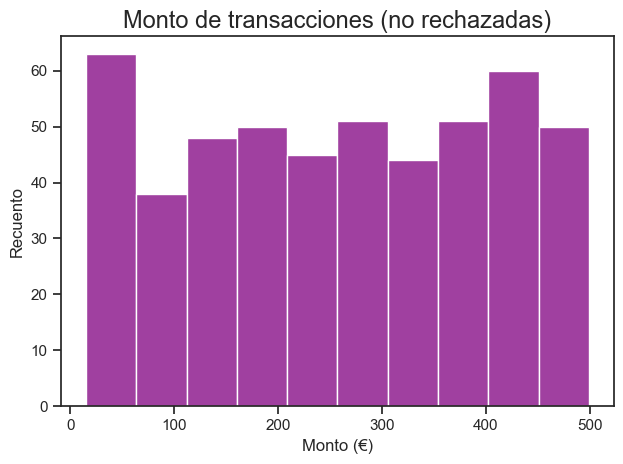

In [26]:
transactionsND = transactions[transactions['declined'] == 0]

sns.histplot(data=transactionsND, x='amount', bins=10, color='purple')

plt.title('Monto de transacciones (no rechazadas)', fontsize=17)
plt.xlabel('Monto (€)')
plt.ylabel('Recuento')
plt.tight_layout();

#### Análisis e interpretación
Se eligió un histograma para visualizar una variable numérica, en este caso el monto de cada una de las transacciones no rechazadas, porque este tipo de gráfico muesta la forma de la distribución de los datos. Tras varias pruebas se decidió elegir 10 _bins_ porque parece la cantidad de barras adecuadas para el nivel de detalle necesario para comprender estos datos.

Este histograma presenta una distribución prácticamente uniforme, con un par de barras sobrepasando al resto, el primer y noveno _bin_. De este gráfico se infiere que el gasto por transacción va de poco más de 0 a 500 en una distribución similar, es decir, no hay un monto de transacción más característico o mayoritario.

Me llama la atención que los montos de las transacciones estén distribuidos tan uniformemente, tal vez aconsejaría a la empresa que intentase que las transacciones tiendan más hacia valores más altos, pues vale más la pena enfocar los esfuerzos en lograr más transacciones de montos altos que enfocarlos en conseguir más transacciones de poco monto. 

### Ex 2 - Dues variables numèriques.

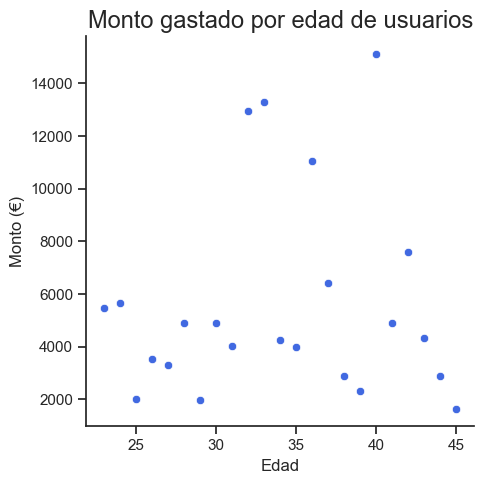

In [27]:
users = users.rename(columns={'id': 'user_id'})
transact_users = pd.merge(transactionsND, users, how='left', on=['user_id'])

sum_amount_age = transact_users.groupby('age').sum('amount')

sns.relplot(data=sum_amount_age, x='age', y='amount', color='royalblue')

plt.title('Monto gastado por edad de usuarios', fontsize=17)
plt.xlabel('Edad')
plt.ylabel('Monto (€)')
plt.tight_layout();

#### Análisis e interpretación

De las 3 variables numéricas de la base de datos _transactionsnew_, se decidió realizar un scatterplot para entender qué relación existe entre el monto gastado y las edades de los usuarios, y así averiguar si hay algún rango de edad que realice más compras y poder comprender mejor el perfil de los usuarios.

Del gráfico puede deducirse que la mayoría de los rangos de edad han comprado entre 2000 y 6000 a la empresa, aunque hay cuatro edades puntuales que están muy por encima, comprando de más de 10 000 a más de 14 000 euros. Estas edades están dentro del rango 30-40.

Llama la atención que sean solo cuatro puntos los que se despegan tanto del rango de compras del resto. Quizá debería profundizarse en cuántos clientes de cada edad existen y determinar si los montos elevados responden a clientes que compran mucho o a que hay muchos clientes de esas edades. Cualquiera sea el resultado de ese análisis, parece claro que para la compañía sería beneficioso concentrarse en usuarios de rango etario de 30 a 40 años.

### Ex 3 - Una variable categòrica.

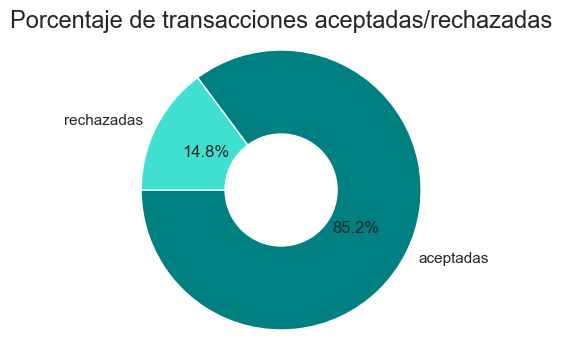

In [28]:
declined_count = transactions['declined'].value_counts()
labels = ['aceptadas', 'rechazadas']
sizes = declined_count.values

plt.figure(figsize=(5, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=180, colors=['teal', 'turquoise'])
plt.title('Porcentaje de transacciones aceptadas/rechazadas', fontsize=17)
plt.axis('equal')

centre_circle = plt.Circle((0,0),0.40, fc='white')
plt.gca().add_artist(centre_circle)

plt.tight_layout
plt.show()

#### Análisis e interpretación

La variable categórica elegida fue el campo 'declined', que indica si la transacción fue aceptada o rechazada. En cuanto a operativas internas de la empresa, puede ser importante saber cuántas transacciones terminan siendo rechazadas y tomar medidas para evitarlo. Una forma clara y bastante intuitiva de entender la magnitud de las transacciones rechazadas es con un porcentaje.

Del gráfico de anillo se desprende que casi un 15 % de las transacciones realizadas son rechazadas. Este valor parece alto, teniendo en cuenta la importancia que tiene que las transacciones se realicen con éxito para que la empresa puede recibir los pagos y continuar con su funcionamiento normal.

Parece un tanto alarmante para la empresa que el porcentaje de transacciones rechazadas sea tan alto. Se aconsejaría investigar las causas de esas transacciones fallidas para poder subsanar la situación.


### Ex 4 - Una variable categòrica i una numèrica.

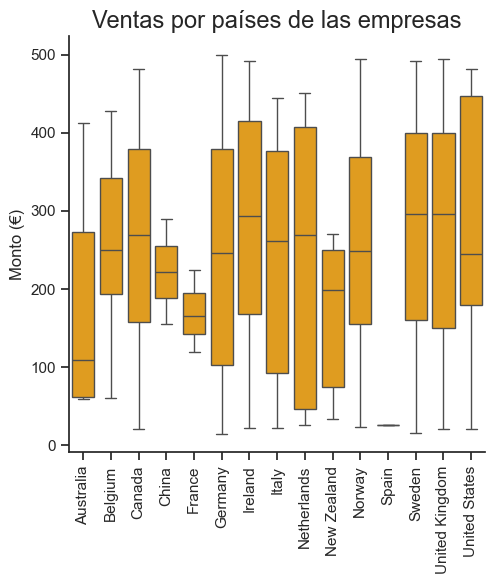

In [29]:
companies = companies.rename(columns={'id': 'company_id'})
transact_companies = pd.merge(transactionsND, companies, how='left', on=['company_id'])

countries = sorted(list(companies['country']))

ax = sns.catplot(data=transact_companies, x='country', y='amount', kind='box', color='orange', order= countries)

ax.tick_params(axis='x', rotation=90)

plt.title('Ventas por países de las empresas', fontsize=17)
plt.xlabel(None)
plt.ylabel('Monto (€)')
plt.tight_layout;

#### Análisis e interpretación

Se eligió un catplot con formato 'box' para comprender la distribución de los montos de las transacciones por país.

Este tipo de gráfico muestra la distribución de los valores en cuartiles, los valores máximos y mínimos y la mediana de los valores. Se observa en este caso que no hay _outliers_. Es interesante el caso de Australia, por ejemplo, en que el primer cuartil es muy pequeño, por lo cual no hay mucha variación en la distribución del 25 % de valores más bajos, y la mediana queda bastante abajo también, lo que nuevamente indica que los valores más bajos no tienen tanta variación como sí tienen el 50 % más alto.

Parece claro en el caso de China que, por la simetría de la caja y los bigotes, podría tener solo dos transacciones, una en cada extremo del boxplot. Mirando los datos de la tabla se comprobó que así era. Otro caso que llama la atención es España, que tras una exploración de los datos se constata que solo tiene una transacción de €24,28, de allí que sea solo una marca en el boxplot.

### Ex 5 - Dues variables categòriques.

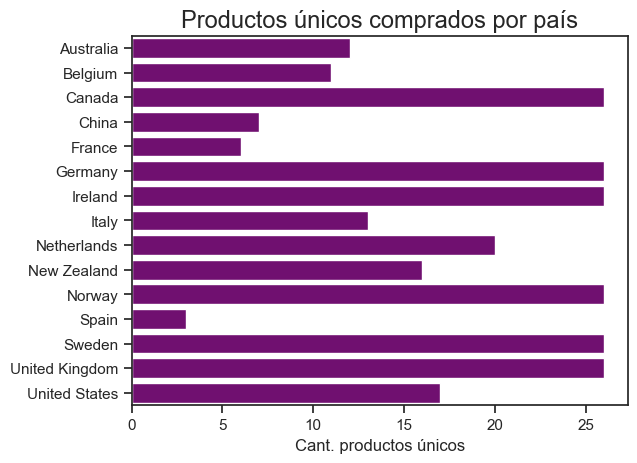

In [30]:
transact_companies = transact_companies.rename(columns={'id': 'transaction_id'})
transact_companies_prod = pd.merge(transact_companies, bridge_products, how='left', on=['transaction_id'])

country_prod_count = transact_companies_prod.groupby('country')['product_id'].nunique()
country_prod_count = country_prod_count.reset_index()

sns.barplot(data=country_prod_count, x='product_id', y='country', errorbar=None, color='purple', order=countries)

plt.title('Productos únicos comprados por país', fontsize=17)
plt.ylabel(None)
plt.xlabel('Cant. productos únicos')
plt.tight_layout;

#### Análisis e interpretación

Se decidió mostrar con un gráfico de barras la cantidad de productos únicos del catálogo que se compran en cada país. Se agrupó por países y se contabilizaron las ocurrencias únicas de las id de producto para tener así una idea de la variedad del catálogo que se compra en cada país.

En ningún país se compró más de 26 productos del catálogo, con solo 6 países llegando a ese máximo. España, China y Francia son los que menos variedad de producto compraron, lo cual tiene sentido si se toma en cuenta el monto de ventas a esos países.

Se recomendaría un análisis más exhaustivo para averiguar cuáles son los productos más vendidos y si existen productos que no se vendan, pero llama la atención que se compre tan poca variedad del catálogo. Sea cual sea la conclusión de este análisis exhaustivo, deberá considerarse qué beneficio comporta tener tantos productos en el catálogo o si sería necesario reducirlo.

### Ex 6 - Tres variables.

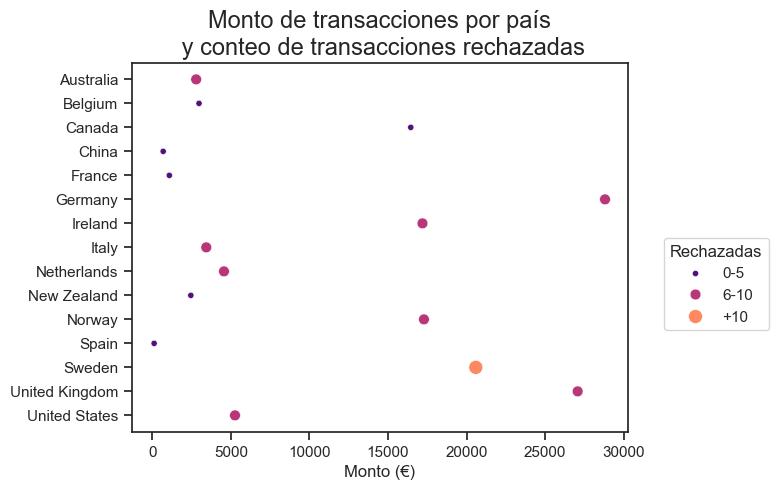

In [36]:
transactionsND = transactions[transactions['declined'] == 0]
transact_companies = pd.merge(transactions, companies, how='left', on=['company_id'])
sum_amount_country = transact_companies.groupby('country').sum(numeric_only=True) #suma también 'declined' como numérico, por lo que cuenta las rechazadas

sum_amount_country['rechazadas'] = pd.cut(sum_amount_country['declined'], bins=[0, 5, 10, 50], labels=['0-5', '6-10', '+10'])

sns.scatterplot(data=sum_amount_country, x='amount', y='country', palette='magma', hue='rechazadas', size = 'rechazadas', sizes=(100,20))

plt.title('Monto de transacciones por país\n y conteo de transacciones rechazadas', fontsize = 17)
plt.xlabel('Monto (€)')
plt.ylabel(None)
plt.legend(bbox_to_anchor=(1.3, 0.4), loc='center right', title= 'Rechazadas')
plt.tight_layout;

#### Análisis e interpetación

Se realizó un scatterplot con burbujas de diferentes colores y tamaños para comprender cómo se ubica cada país en cuanto a monto y transacciones rechazadas.

Puede verse que en los 3 países de menos ventas, la cantidad de transacciones rechazadas fue baja, lo cual parece razonable. En el otro extemo del eje x, los 2 países con más ventas, Alemania y Reino Unido, tuvieron un total de 6 a 10 transacciones rechazadas, que para los montos logrados, no parece ser tan alarmante.

Suecia es el único país que destaca por tener más de 10 transacciones rechazadas, pero también debe considerarse que es un país con buenas ventas, por lo que quizá esta cantidad de transacciones rechazadas no sea significiativa en proporción al monto total. Llaman la atención Australia, Italia, Países Bajos y Estados Unidos, que tienen de 6 a 10 transacciones rechazadas pero cuyos montos de ventas rondan o son inferiores a €5000 solamente.

En cuanto al monto gastado por país, pueden apreciarse claramente dos grupos: uno con ventas de hasta poco más de €5000 y otro grupo de países que superan los €17 000, de los cuales solo Canadá no llega a 5 transacciones rechazadas, por lo que parece un buen caso para estudiar en profundidad e intentar replicar.

### Ex 7 - Graficar un Pairplot.

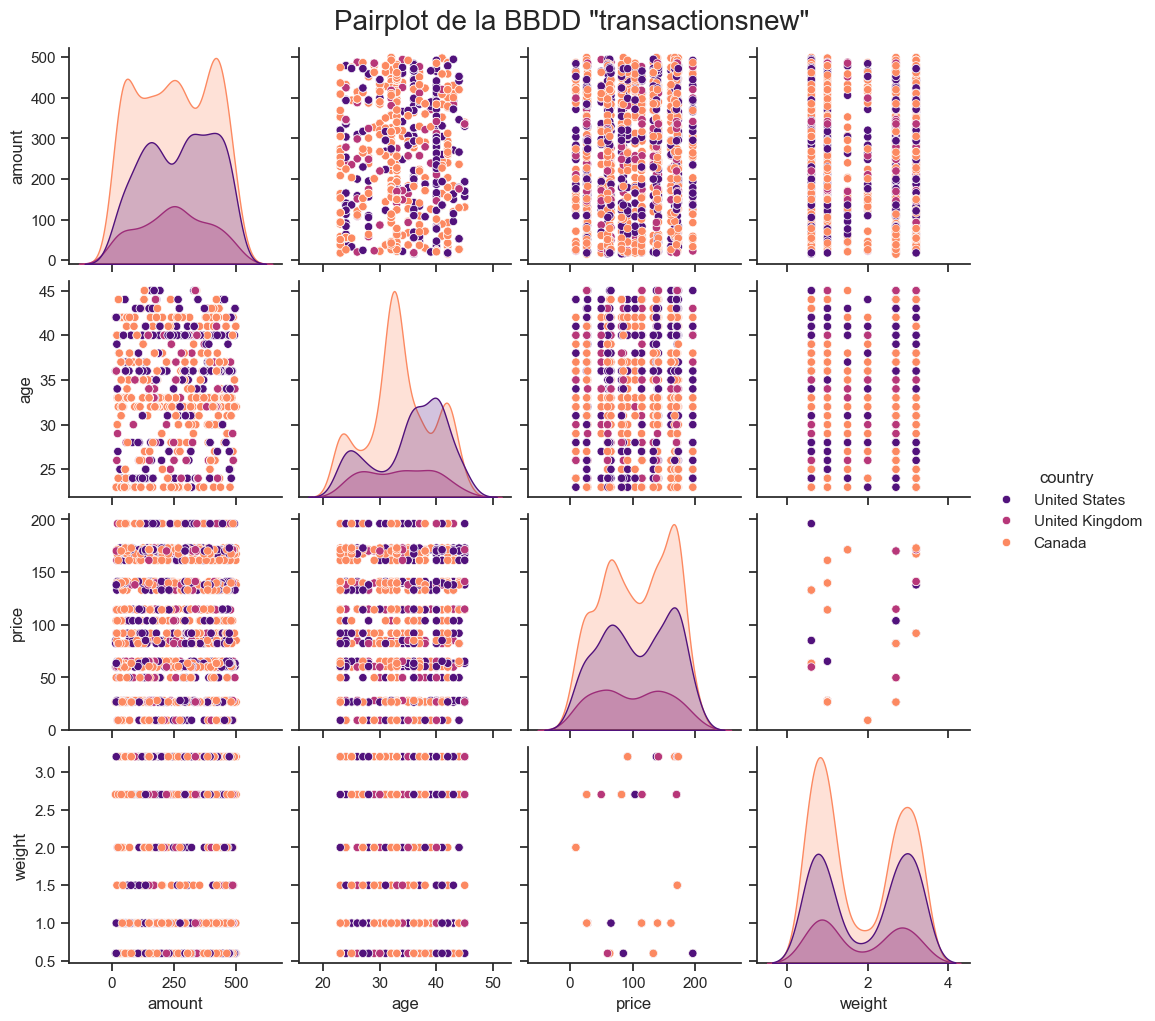

In [32]:
transact_users = transact_users.rename(columns={'id': 'transaction_id'})
products = products.rename(columns={'id': 'product_id'})

transact_users_prod = transact_users.merge(bridge_products, on='transaction_id').merge(products, on='product_id')

transact_users_prod = transact_users_prod[['transaction_id', 'amount', 'age', 'price', 'weight', 'country']]

sns.pairplot(transact_users_prod, kind='scatter', hue='country', palette='magma').figure.suptitle('Pairplot de la BBDD "transactionsnew"',x= 0.5, y= 1.02, size=20)

plt.tight_layout;

#### Análisis e interpretación

Para realizar este pairplot se juntaron varias tablas y se tomaron solo las columnas numéricas de estas. Se agregó además una leyenda por colores para distinguir los países de los usuarios.

Ninguna de las variables numéricas parecen tener relación con las demás, y el filtro por países de los usuarios tampoco aporta mayor claridad.

Lo más interesante son los gráficos KDE del eje diagonal, donde, por ejemplo se observan montos bajos, medios y elevados en Reino Unido, Estados Unidos y Canadá respectivamente. En cuanto a la edad, en Canadá destaca la distribución que indica densidad de usuarios de entre alrededor de 30 y 40 años. Los precios de los productos que compraron los usuarios de Reino Unido presentan una distribución casi en meseta, mientras los de Estados Unidos presentan dos picos alrededor del 70 y el 180 y para Canadá esos dos picos son aún más pronunciados. En cuanto al peso de los productos, también la distribución presenta dos picos, uno alrededor de 0,8 y el otro alrededor de 3.